# Introduction to Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay


%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

### What is a Support Vector Machine (SVM)

SVM is a supervised machine learning algorithm that can be used
for classification, regression and outlier detection.

In this document we will only apply SVM only to classification problems.

### Examples of SVM use

Some of the real world uses of SVM are the following:

- Handwriting recognition
- Intrusion detection
- Face detection
- Email classification
- Gene classification


### Pros of using SVM
- Applicable to datasets containing multiple features.
- Effective even if the number of features is greater than the number of data points.
- Memory efficient ( compared to NN).
- Custom kernel functions are supported.
- Functions well where the data classes are well defined.
- It is more productive in high dimensional spaces. 


### Cons of using SVM

- If the number of features are a lot larger that the number of samples the overfitting is very possible.
- The output of the SVM does not contain a probability estimate.
- Some implementation complexity when custom kernels are needed.
- Not suitable for large datasets (the algorithm becomes very complex).
- Does not perform well when data is overlapping.


## Example of  SVM in detecting 2 classes (linearly separated)

Now we will see the simplest possible example of applying the SVM. The dataset
consists of 2 classess that are linearly separable.

#### Create the testing data

We use the same function and technique we have used for the 
k-means introduction to create a data sample that can be linearly 
separated:

#### Assign the classes

To assign the classes we use the k-means algorithm that we already know
to similulate a dataset with two different set (colors)

#### Find the SVM separators

We use the sciklearn implementation of SVM to solve the classifier and then 
we plot the solution to make it visually intuitive:

## Scikit Support Vector Machine 

For all of our examples where SVM will be needed we will use the Scikit
implemenation that is one of the most widely used and has become the de-facto
standard in in the python world.

https://scikit-learn.org/stable/modules/svm.htmlhttps://scikit-

The most important class that we will use is the SVC whose full documenation 
can be seen here:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

as we can see the SVC class exposes many parameters and attributes and intead of 
trying to explain them up front we will describe them in an on going basis as we
we will need them for the examples we will be solving.

## Read here about the effectiveness of SVM: http://yann.lecun.com/exdb/mnist/

In [2]:
def make_clustered_data(n_clusters, n_samples, cluster_std=3):
    """Creates clustered data that can be uses for classification."""
    features, _ = make_blobs(
        n_samples = n_samples,
        n_features = 2, 
        centers = n_clusters,
        cluster_std=cluster_std,
        shuffle = True
    )

    return pd.DataFrame(features, columns=["x", "y"])


Number of rows
Train 120
Test 30


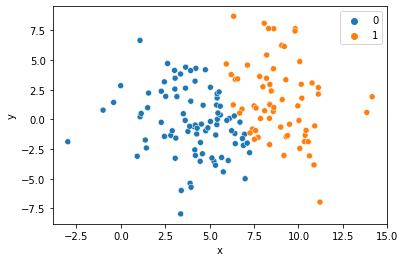

In [3]:
NUM_CLASSES = 2

df = make_clustered_data(NUM_CLASSES, 150, cluster_std=3)
kmeans = KMeans(n_clusters=NUM_CLASSES)
kmeans.fit(df)

data = df.copy()
data["Label"] = kmeans.labels_
_ = sns.scatterplot(x = df["x"], y = df["y"], hue=kmeans.labels_)

X = data.copy()
Y = pd.DataFrame(X.pop("Label"))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Number of rows")
print("Train", X_train.shape[0])
print("Test", X_test.shape[0])

Accuracy : 1.0000


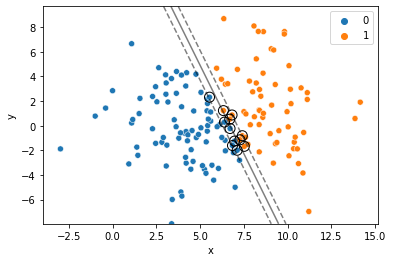

In [4]:
clf=SVC(kernel='linear', C=1.0) 

# fit classifier to training set
clf.fit(X_train,y_train)

# make predictions on test set
y_pred=clf.predict(X_test)

# compute and print accuracy score
print('Accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

_ = sns.scatterplot(x = df["x"], y = df["y"], hue=kmeans.labels_)

# # plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# # plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

## Example of  SVM in detecting 2 classes (linearly separated)

Similarly to how we used SVM to separate the SVM when we have two linearly 
separated classes we can solve the classification for 3 or more linearly 
separated datasets as we can see in the following code:

Number of rows
Train 120
Test 30
Accuracy : 0.9667


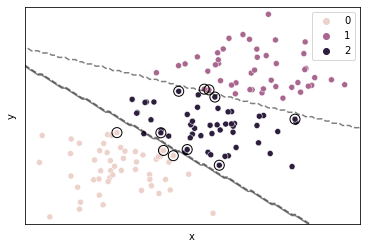

In [5]:
NUM_CLASSES = 3

df = make_clustered_data(NUM_CLASSES, 150, cluster_std=3)
kmeans = KMeans(n_clusters=NUM_CLASSES)
kmeans.fit(df)

data = df.copy()
data["Label"] = kmeans.labels_
_ = sns.scatterplot(x = df["x"], y = df["y"], hue=kmeans.labels_)

X = data.copy()
Y = pd.DataFrame(X.pop("Label"))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Number of rows")
print("Train", X_train.shape[0])
print("Test", X_test.shape[0])

clf=SVC(kernel='linear', C=1.0) 

# fit classifier to training set
clf.fit(X_train,y_train)

# make predictions on test set
y_pred=clf.predict(X_test)

# compute and print accuracy score
print('Accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

#_ = sns.scatterplot(x = df["x"], y = df["y"], hue=kmeans.labels_)

# # plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# # plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.xticks([])
plt.yticks([])


plt.show()




# Examining some of the most common parameters to SVN constructor

We can see that we they way we are constructing the SVM instance is the following:

```python
clf=SVC(kernel='linear', C=1.0) 
```

## The Kernel parameter

We can thing of the **kernel** parameter as the one that "affects" the schema of the the 
separator.  For example in the previous example where we used SVM to separate three 
classes of data, if we were using the **rbf** kernel instead of the **linear** 
the resulting classifier could be something similar to the following:

<img src="./images/SVM-104.png" style="width:320px"/>

The possible values the the kernel can take are the following:

- linear
- poly
- rbf
- sigmoid 
- precomputed

We will see most of them later as we will be solving more complicated problems and
we will face the need for more granular separators.


## The Regularization parameter

The **regularization parameter** is passed as **C** as we can see in the construction
of the SVC instance defines the degree of **tolerance** we might allow for misclassified
data when training the algorithm.





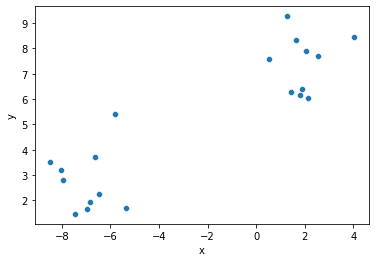

In [6]:
df = pd.read_csv("./data/2-classes.csv")
_ = sns.scatterplot(x = df["x"], y = df["y"])

In [7]:
X = df[["x", "y"]]
Y = df[["Label"]]

In [8]:
def show_C_usage(C):
    clf=SVC(kernel='linear', C=C) 

    clf.fit(X, Y)
    # # plot the decision function
    _ = sns.scatterplot(x = df["x"], y = df["y"])
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        ax=ax,
    )
    # # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    
    plt.title(f"C={C}")
    plt.show()


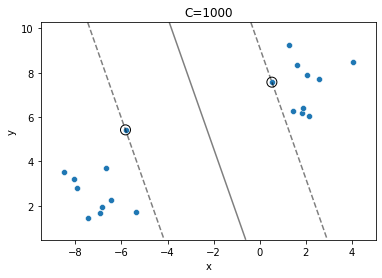

In [9]:
show_C_usage(C=1000)

show_C_usage(C=0.002)

# An example of how SVM can classify NON Linear data

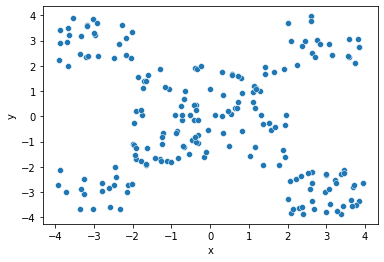

In [10]:
df = pd.read_csv("./data/non-linear-separation.csv")

_ = sns.scatterplot(x = df["x"], y = df["y"])

In [11]:
X = df[["x", "y"]]
Y = df[["Label"]]

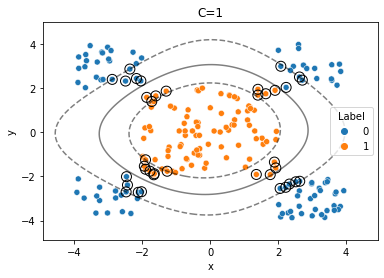

In [12]:
C = 1
clf=SVC(kernel='rbf', C=C) 

clf.fit(X, Y)
# # plot the decision function
_ = sns.scatterplot(x = df["x"], y = df["y"], hue=df.Label)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# # plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.title(f"C={C}")
plt.show()
